# Characteristics of Businesses - Group Exercise

In [1]:
import pandas as pd
import requests

tech_variables = 'https://api.census.gov/data/2018/abstcb/variables.html'
owner_variables = 'https://api.census.gov/data/2018/abscbo/variables.html'
characteristics_variables = 'https://api.census.gov/data/2018/abscb/variables.html'
company_summary_variables = 'https://api.census.gov/data/2018/abscs/variables.html'


### Get Tables of Variables

In [2]:
tech_vars = pd.read_html(tech_variables)[0]
owner_vars = pd.read_html(owner_variables)[0]
characteristic_vars = pd.read_html(characteristics_variables)[0]
company_summary_vars = pd.read_html(company_summary_variables)[0]

tech_vars = tech_vars[[_ for _ in tech_vars.columns[:2]]]
owner_vars = owner_vars[[_ for _ in owner_vars.columns[:2]]]
characteristic_vars = characteristic_vars[[_ for _ in characteristic_vars.columns[:2]]]
company_summary_vars = company_summary_vars[[_ for _ in company_summary_vars.columns[:2]]] 

tech_vars.rename(columns = {'Label': 'Tech Labels'}, inplace = True)
owner_vars.rename(columns = {'Label': 'Owner Labels'}, inplace = True)
characteristic_vars.rename(columns = {'Label': 'Characteristic Labels'}, inplace = True)
company_summary_vars.rename(columns = {'Label': 'Company Summary Labels'}, inplace = True)

In [3]:
grouped_tables = pd.merge(tech_vars, owner_vars, left_on = 'Name', right_on = 'Name', how = 'outer')
grouped_tables = pd.merge(grouped_tables, characteristic_vars, left_on = 'Name', right_on = 'Name', how = 'outer')
grouped_tables = pd.merge(grouped_tables, company_summary_vars , left_on = 'Name', right_on = 'Name', how = 'outer')
grouped_tables.fillna("-", inplace = True)
grouped_tables = grouped_tables[(~grouped_tables['Tech Labels'].str.contains('Standard error|standard error'))]
grouped_tables = grouped_tables[(~grouped_tables['Owner Labels'].str.contains('Standard error|standard error'))]
grouped_tables = grouped_tables[(~grouped_tables['Characteristic Labels'].str.contains('Standard error|standard error'))]
grouped_tables = grouped_tables[(~grouped_tables['Company Summary Labels'].str.contains('Standard error|standard error'))]

grouped_tables.reset_index(drop = True, inplace = True)
grouped_tables = grouped_tables[:-2]

In [4]:
# grouped_tables.sort_values(by = 'Name', ascending = False)
vars_of_interest = [
    'NAICS2017',
    'YIBSZFI',
    'SEX',
    'QDESC',
    'NSFSZFI',
    'GEO_ID',
    'RACE_GROUP',
    'BUSCHAR',
    'OWNER_RACE',
    'OWNER_SEX']
target_subset = grouped_tables[(grouped_tables['Name'].isin(vars_of_interest))]
target_subset = target_subset[['Name','Company Summary Labels','Characteristic Labels','Owner Labels','Tech Labels']]

### Build variable strings to pass to api call


In [5]:
variable_dict = {}
for i,label in enumerate(target_subset.columns[1:]):
    variable_list = []
    for item in target_subset[(target_subset[label] != "-")].Name.tolist():
        variable_list.append(item)
        variable_list.append(f'{item}_LABEL')
    variable_list = [_ for _ in variable_list if _ not in ['GEO_ID_LABEL']]#, 'QDESC_LABEL']]
    in_table = "NAME," + ",".join(variable_list)
    variable_dict[i] = in_table
variable_dict


{0: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,YIBSZFI,YIBSZFI_LABEL',
 1: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YIBSZFI,YIBSZFI_LABEL',
 2: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_SEX,OWNER_SEX_LABEL,QDESC,QDESC_LABEL',
 3: 'NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL'}

In [6]:
# Might be able to pass in the same vars for every call, and if it exists it will be returned. Not sure if this will work.
# otherwise, store the variables in a dictionary where the key is 0-3 and the values are a string of the variables

industry_code = '61'
qdesc1 = 'B27'
# links = [
#     f'https://api.census.gov/data/2018/abscs?get={variable_dict[0]}&for=state:*&NAICS2017={industry_code}',
#     f'https://api.census.gov/data/2018/abscb?get={variable_dict[1]}&for=state:*&NAICS2017={industry_code}&BUSCHAR&QDESC={qdesc1}',
#     f'https://api.census.gov/data/2018/abscbo?get={variable_dict[2]}&for=state:*&OWNCHAR=CG&NAICS2017={industry_code}&QDESC={qdesc1}',
#     f'https://api.census.gov/data/2018/abstcb?get={variable_dict[3]}&for=state:*&NAICS2017={industry_code}'
# ]
# removed from working link: GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL
links = [
    f'https://api.census.gov/data/2018/abscs?get={variable_dict[0]},FIRMPDEMP&for=state:*',
    f'https://api.census.gov/data/2018/abscb?get={variable_dict[1]},FIRMPDEMP&for=state:*',
    f'https://api.census.gov/data/2018/abscbo?get={variable_dict[2]},OWNCHAR,OWNCHAR_LABEL&for=us:*&for=QDESC_LABEL=YRACQBUS',
    f'https://api.census.gov/data/2018/abstcb?get={variable_dict[3]},FIRMPDEMP,TECHUSE&for=state:*',
]

def get_data_frame(url):
    return pd.read_csv(url)
    
for link in links:
    print(link)
    print("")

https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP&for=state:*

https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP&for=state:*

https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_SEX,OWNER_SEX_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL&for=us:*&for=QDESC_LABEL=YRACQBUS

https://api.census.gov/data/2018/abstcb?get=NAME,GEO_ID,NAICS2017,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,RACE_GROUP,RACE_GROUP_LABEL,SEX,SEX_LABEL,FIRMPDEMP,TECHUSE&for=state:*



### The cell below is where the dataframes are first stored.

In [7]:
comp_sum_df = get_data_frame(links[0]) # Company Summary
bus_char_df = business_char_df = get_data_frame(links[1]) # Business Characteristics
bus_own_df = business_own_df = get_data_frame(links[2]) # Business Owners
bus_tech_df = get_data_frame(links[3]) # Business Tech   

In [8]:
df_collection = [comp_sum_df, bus_char_df, bus_own_df, bus_tech_df]    
df_names = ['comp_sum_df', 'bus_char_df', 'bus_own_df', 'bus_tech_df']   

### Clean DataFrames

In [9]:
drop_list = [
    'race_group','sex','yibszfi','qdesc','buschar',
    'owner_race','owner_sex','us','ownchar'
]

for df in df_collection:
    column_names = [_ for _ in df.columns.tolist()]
    new_column_names = [_.replace("[[","").replace('"',"").replace("]","").lower() for _ in column_names]

    df.columns = new_column_names
    df.drop(columns = [_ for _ in new_column_names if ('unnamed' in _ or _ in drop_list)],inplace = True)
    df['name'] = df['name'].apply(lambda x: x.replace("[","").replace('"',""))
    
    if 'sex_label' in df.columns:
        df.rename(columns = {'sex_label': 'gender'}, inplace = True)
    
    if 'owner_sex_label' in df.columns:
        df.rename(columns = {'owner_sex_label': 'gender'}, inplace = True)
    
    if 'naics2017_label' in df.columns:
        df.rename(columns = {'naics2017_label': 'industry'}, inplace = True)
        
    if 'naics2017' in df.columns:
        df.rename(columns = {'naics2017': 'industry_code'}, inplace = True)

### Display some info about dataframes.

In [10]:
for i,df in enumerate(df_collection):
    print('\n############# NEW DATAFRAME ################')
    print('Displaying column value counts where there are fewer than 10 unique values in the column.')
    print(f'\n---  DataFrame: {df_names[i]} ---------------------')
    print(f'Columns: {", ".join(df.columns.tolist())}')
    for column in df:
        if len(df[column].unique().tolist()) < 10:
            print(df[column].value_counts())
            print("")
    print('############# END OF DATAFRAME INFO ################\n')


############# NEW DATAFRAME ################
Displaying column value counts where there are fewer than 10 unique values in the column.

---  DataFrame: comp_sum_df ---------------------
Columns: name, geo_id, industry_code, industry, race_group_label, gender, yibszfi_label, firmpdemp, state
Total                                         27311
White                                         11327
Nonminority                                   11320
Minority                                       9285
Asian                                          7748
Black or African American                      6433
Equally minority/nonminority                   6133
American Indian and Alaska Native              4509
Native Hawaiian and Other Pacific Islander     2126
Name: race_group_label, dtype: int64

Total                  44001
Male                   15588
Female                 13737
Equally male/female    12866
Name: gender, dtype: int64

All firms                                   27090
Firms w

In [11]:
comp_sum_df[['industry_code','industry']].drop_duplicates()

,industry_code,industry
0,21,"Mining, quarrying, and oil and gas extraction"
13,23,Construction
22,31-33,Manufacturing
31,48-49,Transportation and warehousing
38,00,Total for all sectors
82,44-45,Retail trade
118,11,"Agriculture, forestry, fishing and hunting"
230,22,Utilities
272,42,Wholesale trade
735,51,Information


In [12]:
gender_by_state_cs = comp_sum_df[
    (comp_sum_df['industry_code'].isin(['54','52']))
    ].groupby(by = ['name','industry','gender']
             )[['gender']].agg('count').rename(columns = {'gender': 'gender_count'}).reset_index()

gender_by_state_cs.sort_values(by = ['name', 'industry', 'gender'], inplace = True)
gs = gender_by_state_cs


In [13]:
print(len(comp_sum_df.name.unique())/3)

17.0


In [15]:
df.columns

Index(['name', 'geo_id', 'industry_code', 'industry', 'nsfszfi',
       'nsfszfi_label', 'race_group_label', 'gender', 'firmpdemp', 'techuse',
       'state'],
      dtype='object')

In [16]:
df('geo_id')

TypeError: 'DataFrame' object is not callable

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
state = comp_sum_df['state']
yib = comp_sum_df['yibszfi_label']
graph1 = [state, yib]

In [ ]:
ax = comp_sum_df.plot(title = 'State vs Years in Bis', kind='scatter', x=('yibszfi_label'),y='industry')

In [188]:
working_df=comp_sum_df

In [146]:
working_df.columns

Index(['name', 'geo_id', 'industry_code', 'industry', 'race_group_label',
       'gender', 'yibszfi_label', 'firmpdemp', 'state'],
      dtype='object')

In [176]:
working_df = working_df[working_df.race_group_label == 'Total']
working_df = working_df[working_df.industry == 'Total for all sectors']
working_df = working_df[working_df.gender == 'Total']
#working_df = working_df[working_df.yibszfi_label != 'Firms with 2 to 3 years in business']
#working_df = working_df[working_df.yibszfi_label != 'Firms with 4 to 5 years in business']
#working_df = working_df[working_df.yibszfi_label != 'Firms with 6 to 10 years in business']
#working_df = working_df[working_df.yibszfi_label != 'Firms with 11 to 15 years in business']
working_df = working_df[working_df.yibszfi_label != 'All firms']


In [177]:
working_df = working_df.drop(['geo_id','industry_code','industry','race_group_label','gender'], axis = 1)

In [178]:
working_df = working_df.drop(['state'], axis = 1)

In [179]:
working_min = working_df.groupby(by = ['name'])[['firmpdemp']].agg('min')

In [180]:
working_max = working_df.groupby(by = ['name'])[['firmpdemp']].agg('max')

In [181]:
workingfinal = working_min / working_max

In [182]:
workingfinal = workingfinal[~(workingfinal == 0).all(axis=1)]

In [183]:
workingfinal.reset_index(inplace=True)

In [184]:
i = 0
while i < 40:
    workingfinal['firmpdemp'][i] = workingfinal['firmpdemp'][i] * 100
    i = i + 1
workingfinal

<ipython-input-184-48e1e2533840>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,firmpdemp
0,Alabama,21.515174
1,Arkansas,20.050435
2,California,34.829819
3,Colorado,31.808342
4,Connecticut,17.263697
5,District of Columbia,24.583127
6,Florida,39.478123
7,Georgia,29.919201
8,Hawaii,17.788508
9,Idaho,25.879581


In [185]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}
workingfinal['Code'] = workingfinal['name'].map(code)

In [186]:
workingfinal.rename(columns = {'firmpdemp':'% of Firms < Two Years Old'}, inplace = True)
workingfinal

,name,% of Firms < Two Years Old,Code
0,Alabama,21.515174,AL
1,Arkansas,20.050435,AR
2,California,34.829819,CA
3,Colorado,31.808342,CO
4,Connecticut,17.263697,CT
5,District of Columbia,24.583127,DC
6,Florida,39.478123,FL
7,Georgia,29.919201,GA
8,Hawaii,17.788508,HI
9,Idaho,25.879581,ID


In [187]:
fig = px.choropleth(workingfinal,
                    locations='Code',
                    color='% of Firms < Two Years Old',
                    color_continuous_scale='spectral_r',
                    locationmode='USA-states',
                    scope='usa')
fig.add_scattergeo(
    locations=workingfinal['Code'],
    locationmode='USA-states',
    text=workingfinal['Code'],
    mode='text')

fig.update_layout(
    title={'text':'Percentage of Total Businesses Less Than Two Years Old by State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig

In [96]:
import plotly.express as px

In [347]:
working_df=comp_sum_df

In [348]:
working_df = working_df[working_df.race_group_label == 'Total']
working_df = working_df[working_df.industry == 'Total for all sectors']
working_df = working_df[working_df.gender == 'Total']
#working_df = working_df[working_df.yibszfi_label != 'Firms with 2 to 3 years in business']
#working_df = working_df[working_df.yibszfi_label != 'Firms with 4 to 5 years in business']
#working_df = working_df[working_df.yibszfi_label != 'Firms with 6 to 10 years in business']
#working_df = working_df[working_df.yibszfi_label != 'Firms with 11 to 15 years in business']
working_df = working_df[working_df.yibszfi_label != 'All firms']


In [349]:
working_df1 = working_df[working_df.name == 'Florida']
working_df2 = working_df[working_df.name == 'West Virginia']


In [350]:
working_df1 = working_df1.drop(['geo_id','industry_code','industry','race_group_label','gender','state'], axis = 1)
working_df2 = working_df2.drop(['geo_id','industry_code','industry','race_group_label','gender','state'], axis = 1)

In [351]:
working_df2['firmpdemp'] = working_df2['firmpdemp'].astype(float)
working_df1['firmpdemp'] = working_df1['firmpdemp'].astype(float)

In [352]:
working_df2['firmpdemp']

40817     2201.0
40818     2104.0
40819     1523.0
40820     3178.0
40821     3886.0
40900    10476.0
Name: firmpdemp, dtype: float64

In [353]:
i = 60339
while i < 60345:
    working_df1['firmpdemp'][i] = (working_df1['firmpdemp'][i] * .000223532620)
    i = i + 1

<ipython-input-353-7bd418f798af>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [354]:
i = 40817
while i < 40822:
    working_df2['firmpdemp'][i] = (working_df2['firmpdemp'][i] * 0.004279356384)
    i = i + 1
working_df2['firmpdemp'][40900] = (working_df2['firmpdemp'][40900] * 0.004279356384)



<ipython-input-354-0d95a4833e5d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-354-0d95a4833e5d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [356]:
working_df2

,name,yibszfi_label,firmpdemp
40817,West Virginia,Firms with less than 2 years in business,9.418863
40818,West Virginia,Firms with 2 to 3 years in business,9.003766
40819,West Virginia,Firms with 4 to 5 years in business,6.517460
40820,West Virginia,Firms with 6 to 10 years in business,13.599795
40821,West Virginia,Firms with 11 to 15 years in business,16.629579
40900,West Virginia,Firms with 16 or more years in business,44.830537


In [357]:
pivot_df = working_df1.pivot(index='name', columns='yibszfi_label', values='firmpdemp')
pivot_df1 = working_df2.pivot(index='name', columns='yibszfi_label', values='firmpdemp')

In [358]:
pivot_df2 = pd.concat([pivot_df1, pivot_df], axis = 0)

In [359]:
pivot_df2

yibszfi_label,Firms with 11 to 15 years in business,Firms with 16 or more years in business,Firms with 2 to 3 years in business,Firms with 4 to 5 years in business,Firms with 6 to 10 years in business,Firms with less than 2 years in business
name,,,,,,
West Virginia,16.629579,44.830537,9.003766,6.517460,13.599795,9.418863
Florida,14.374712,26.504710,13.994483,10.463562,17.275048,17.387485


<AxesSubplot:xlabel='name'>

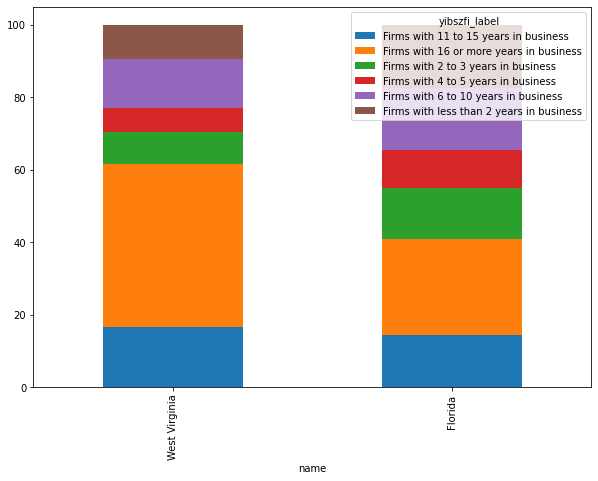

In [360]:
import matplotlib.pyplot as plt
import matplotlib

pivot_df2.plot.bar(stacked=True, figsize=(10,7))
